In [40]:
import matplotlib.patches as mpatches

In [1]:
data = pd.read_csv('./data/mlb-pitches.csv')
data.drop(columns = ['Unnamed: 0'], inplace = True) 

pd.set_option('max_columns', None)
print(data.shape)
data.head(3)

(709851, 86)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,plate_-x,pfx_-x
0,FF,2021-10-03,92.3,1.40,6.80,"Smith, Will",596019,519293,field_out,hit_into_play,1.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,X,5.0,ground_ball,1,2,2021,8.28,16.56,-0.69,2.83,NaN,NaN,NaN,2,9,Top,77.54,155.31,518595.0,-6.833043,-134.166485,-7.361843,9.708393,26.562803,-14.083224,3.32,1.51,13.0,95.2,-13.0,92.8,2330.0,6.5,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.03,0.174,0.158,0.0,1.0,0.0,0.0,2.0,61,4,4-Seam Fastball,5,0,0,5,0,5,0,5,Infield shift,Strategic,148.0,0.0,-0.073,0.69,-8.28
1,SL,2021-10-03,80.6,1.60,6.64,"Smith, Will",596019,519293,NaN,foul,4.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,S,NaN,NaN,1,1,2021,-9.24,5.76,-0.71,2.62,NaN,NaN,NaN,2,9,Top,NaN,NaN,518595.0,-3.700232,-117.430885,-3.266842,-6.531123,19.793390,-27.369114,3.32,1.51,108.0,75.3,75.0,81.2,2254.0,6.4,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,3,Slider,5,0,0,5,0,5,0,5,Infield shift,Strategic,315.0,0.0,-0.027,0.71,9.24
2,CU,2021-10-03,75.5,1.46,6.88,"Smith, Will",596019,519293,NaN,foul,5.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,S,NaN,NaN,1,0,2021,-7.80,-6.12,-0.04,2.46,NaN,NaN,NaN,2,9,Top,NaN,NaN,518595.0,-1.977183,-109.901781,-1.155694,-4.872924,20.602334,-36.262184,3.32,1.51,157.0,83.5,65.0,75.2,1940.0,6.2,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,2,Curveball,5,0,0,5,0,5,0,5,Infield shift,Standard,328.0,0.0,-0.020,0.04,7.80


In [26]:
data.description.value_counts()

ball                       235415
foul                       125328
hit_into_play              120921
called_strike              115956
swinging_strike             75331
blocked_ball                17234
foul_tip                     6693
swinging_strike_blocked      4689
hit_by_pitch                 2095
foul_bunt                    1562
missed_bunt                   361
bunt_foul_tip                  40
pitchout                       33
foul_pitchout                   1
Name: description, dtype: int64

In [51]:
stro = data.loc[data['player_name'] == 'Stroman, Marcus'].copy()
stro_hit = stro.loc[stro['description'] == 'hit_into_play'].copy()
hendricks = data.loc[data['player_name'] == 'Hendricks, Kyle'].copy()

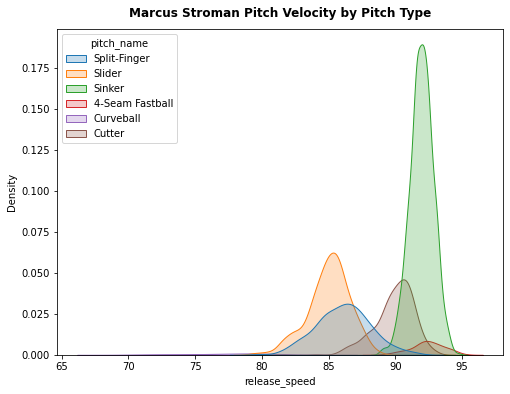

In [20]:
plt.figure(figsize = (8, 6))

ax = sns.kdeplot(data = stro, x = 'release_speed', hue = 'pitch_name', 
                 fill = True, palette = 'tab10')
sns.move_legend(ax, 'upper left')
plt.title('Marcus Stroman Pitch Velocity by Pitch Type', fontsize = 12, fontweight = 'bold', pad = 12);

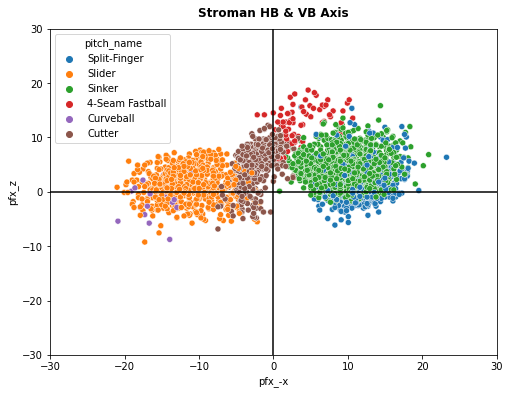

In [31]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = stro, x = 'pfx_-x', y = 'pfx_z', hue = 'pitch_name', palette = 'tab10')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.title('Stroman HB & VB Axis', fontsize = 12, fontweight = 'bold', pad = 12);

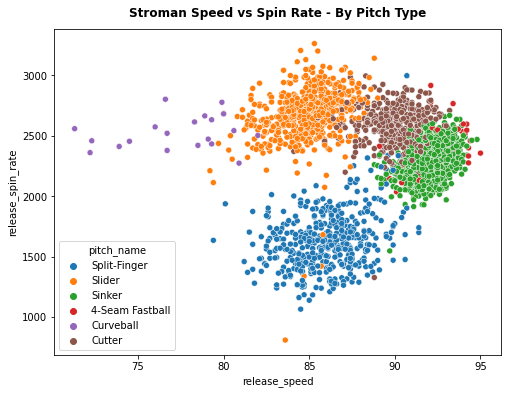

In [32]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = stro, x = 'release_speed', y = 'release_spin_rate',
                hue = 'pitch_name', palette = 'tab10')
plt.title('Stroman Speed vs Spin Rate - By Pitch Type', fontsize = 12, fontweight = 'bold', pad = 12);

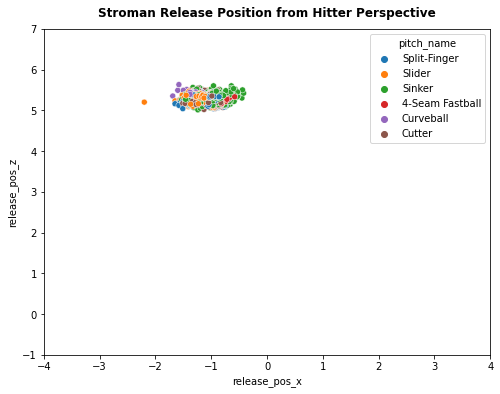

In [35]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = stro, x = 'release_pos_x', y = 'release_pos_z', 
                hue = 'pitch_name', palette = 'tab10')
plt.xlim(-4, 4)
plt.ylim(-1, 7)
plt.title('Stroman Release Position from Hitter Perspective', fontsize = 12, fontweight = 'bold', pad = 12);

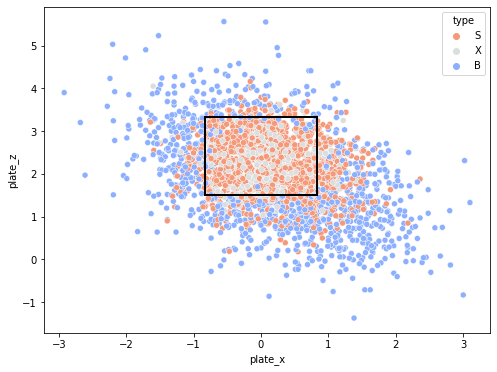

In [41]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = stro, x = 'plate_x', y = 'plate_z', hue = 'type', 
                hue_order = ['S', 'X', 'B'], palette = 'coolwarm_r')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height, 
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect);

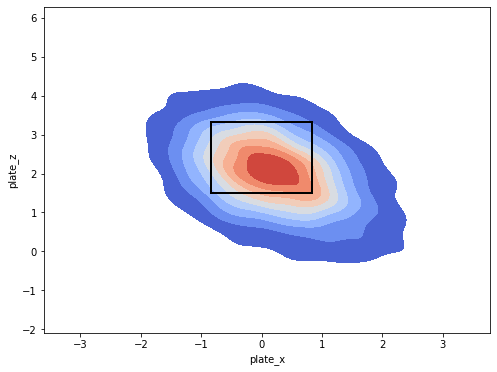

In [50]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = stro, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height, 
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect);

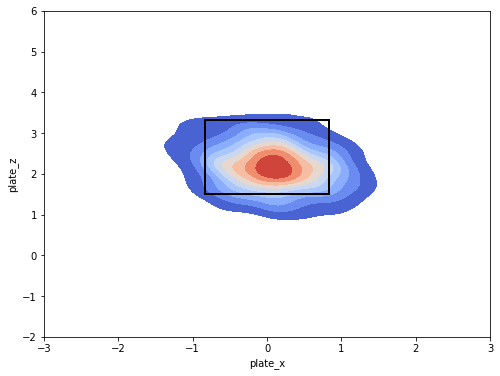

In [53]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = stro_hit, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height, 
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.xlim(-3, 3)
plt.ylim(-2, 6);